In [3]:
library("DESeq")

In [4]:
#library(edgeR)
#library(limma)
#library(Glimma)
library(gplots)
library(org.Hs.eg.db)
#library(RColorBrewer)
#library(dplyr)
#library(topGO)
#library(pathview)
library(AnnotationDbi)

In [5]:
df=read.table('merged.txt', sep=',', header=T)

In [6]:
head(df)

id              B1  B2  B3  B4  B5  B6 B7  B8  B9  ⋯ C9 C10 C11 C12 C13 C14
1 ENSG00000288111   0   0   0   0   0  0   0   0   0 ⋯  0   0   0  0   0   0 
2 ENSG00000288110   0   0   0   0   0  0   0   0   0 ⋯  0   0   0  0   0   0 
3 ENSG00000288109   0   0   0   0   0  0   0   0   0 ⋯  0   0   0  0   0   0 
4 ENSG00000288108   0   0   0   0   0  0   0   0   1 ⋯  0   0   0  0   0   1 
5 ENSG00000288107 241 215 362 506 125 61 136 173 282 ⋯ 54 129 133 89  97  11 
6 ENSG00000288106   0   0   0   0   0  0   0   0   0 ⋯  0   0   0  0   0   0 
  C15 C16 C17 C18
1  0   0    0   0
2  0   0    0   0
3  0   0    0   0
4  1   0    0   0
5 33  93  140 144
6  0   0    0   0

In [7]:
#new_df= subset(df, select=c("gene_id","C3","C4","C5","C6","C7","C8","C9","B10","B11","B12","B13","B14","B15","B16"))

In [8]:
#head(new_df)

In [64]:
#rownames(df) <-df[,1]

In [10]:
countdata <- aggregate(df[-1], df[1], mean)

In [11]:
head(countdata)

id              B1  B2  B3  B4  B5 B6 B7  B8  B9  ⋯ C9 C10 C11 C12 C13 C14
1 ENSG00000000003 350 121 432  88 67 53 135 268 187 ⋯ 77 123  74  69  68 22 
2 ENSG00000000005   5   3   8  28  1  1   4   4   6 ⋯  0   3   1   0   1  1 
3 ENSG00000000419 310 185 436 509 73 79 101 204 345 ⋯ 76 169 121  98 127 39 
4 ENSG00000000457 386 191 492 250 81 92 147 325 341 ⋯ 95 238 135 142 160 43 
5 ENSG00000000460 261 155 288 532 95 35  83 195 218 ⋯ 55 152  75  76  80 31 
6 ENSG00000000938 257  97 339 772 57 95 113 189 193 ⋯ 56 154 112  80 100 41 
  C15 C16 C17 C18
1 110  92 262  99
2   3   3   6   2
3 136 108 211 137
4 181 169 267 148
5  86 114 234 114
6 164 127 202 143

In [13]:
countdata$id <- gsub("\\..*","",countdata$id)

In [14]:
head(countdata)

id              B1  B2  B3  B4  B5 B6 B7  B8  B9  ⋯ C9 C10 C11 C12 C13 C14
1 ENSG00000000003 350 121 432  88 67 53 135 268 187 ⋯ 77 123  74  69  68 22 
2 ENSG00000000005   5   3   8  28  1  1   4   4   6 ⋯  0   3   1   0   1  1 
3 ENSG00000000419 310 185 436 509 73 79 101 204 345 ⋯ 76 169 121  98 127 39 
4 ENSG00000000457 386 191 492 250 81 92 147 325 341 ⋯ 95 238 135 142 160 43 
5 ENSG00000000460 261 155 288 532 95 35  83 195 218 ⋯ 55 152  75  76  80 31 
6 ENSG00000000938 257  97 339 772 57 95 113 189 193 ⋯ 56 154 112  80 100 41 
  C15 C16 C17 C18
1 110  92 262  99
2   3   3   6   2
3 136 108 211 137
4 181 169 267 148
5  86 114 234 114
6 164 127 202 143

In [15]:
rownames(countdata) <- countdata[,1]

In [16]:
head(countdata)

id              B1  B2  B3  B4  B5 B6 B7  B8  B9  ⋯ C9 C10 C11
ENSG00000000003 ENSG00000000003 350 121 432  88 67 53 135 268 187 ⋯ 77 123  74
ENSG00000000005 ENSG00000000005   5   3   8  28  1  1   4   4   6 ⋯  0   3   1
ENSG00000000419 ENSG00000000419 310 185 436 509 73 79 101 204 345 ⋯ 76 169 121
ENSG00000000457 ENSG00000000457 386 191 492 250 81 92 147 325 341 ⋯ 95 238 135
ENSG00000000460 ENSG00000000460 261 155 288 532 95 35  83 195 218 ⋯ 55 152  75
ENSG00000000938 ENSG00000000938 257  97 339 772 57 95 113 189 193 ⋯ 56 154 112
                C12 C13 C14 C15 C16 C17 C18
ENSG00000000003  69  68 22  110  92 262  99
ENSG00000000005   0   1  1    3   3   6   2
ENSG00000000419  98 127 39  136 108 211 137
ENSG00000000457 142 160 43  181 169 267 148
ENSG00000000460  76  80 31   86 114 234 114
ENSG00000000938  80 100 41  164 127 202 143

In [17]:
annotations <-AnnotationDbi::select(org.Hs.eg.db, keys =row.names(countdata),column = c("SYMBOL","GENENAME"), keytype = "ENSEMBL", multiVals = "first")

'select()' returned 1:many mapping between keys and columns


In [18]:
head(annotations)

ENSEMBL         SYMBOL  
1 ENSG00000000003 TSPAN6  
2 ENSG00000000005 TNMD    
3 ENSG00000000419 DPM1    
4 ENSG00000000457 SCYL3   
5 ENSG00000000460 C1orf112
6 ENSG00000000938 FGR     
  GENENAME                                                   
1 tetraspanin 6                                              
2 tenomodulin                                                
3 dolichyl-phosphate mannosyltransferase subunit 1, catalytic
4 SCY1 like pseudokinase 3                                   
5 chromosome 1 open reading frame 112                        
6 FGR proto-oncogene, Src family tyrosine kinase

In [19]:
countdata <- merge(countdata, annotations,by.x=0, by.y="ENSEMBL")

In [20]:
head(countdata)

Row.names       id              B1  B2  B3  B4  B5 B6 B7  B8  ⋯ C11 C12 C13
1 ENSG00000000003 ENSG00000000003 350 121 432  88 67 53 135 268 ⋯  74  69  68
2 ENSG00000000005 ENSG00000000005   5   3   8  28  1  1   4   4 ⋯   1   0   1
3 ENSG00000000419 ENSG00000000419 310 185 436 509 73 79 101 204 ⋯ 121  98 127
4 ENSG00000000457 ENSG00000000457 386 191 492 250 81 92 147 325 ⋯ 135 142 160
5 ENSG00000000460 ENSG00000000460 261 155 288 532 95 35  83 195 ⋯  75  76  80
6 ENSG00000000938 ENSG00000000938 257  97 339 772 57 95 113 189 ⋯ 112  80 100
  C14 C15 C16 C17 C18 SYMBOL  
1 22  110  92 262  99 TSPAN6  
2  1    3   3   6   2 TNMD    
3 39  136 108 211 137 DPM1    
4 43  181 169 267 148 SCYL3   
5 31   86 114 234 114 C1orf112
6 41  164 127 202 143 FGR     
  GENENAME                                                   
1 tetraspanin 6                                              
2 tenomodulin                                                
3 dolichyl-phosphate mannosyltransferase subunit 1, catalytic
4 SCY1 like pseudokinase 3                                   
5 chromosome 1 open reading frame 112                        
6 FGR proto-oncogene, Src family tyrosine kinase

In [22]:
dim(countdata)

[1] 60894    42

In [23]:
countdata2<-countdata[,c(41,3:40)]

In [24]:
head(countdata2)

SYMBOL   B1  B2  B3  B4  B5 B6 B7  B8  B9  ⋯ C9 C10 C11 C12 C13 C14 C15 C16
1 TSPAN6   350 121 432  88 67 53 135 268 187 ⋯ 77 123  74  69  68 22  110  92
2 TNMD       5   3   8  28  1  1   4   4   6 ⋯  0   3   1   0   1  1    3   3
3 DPM1     310 185 436 509 73 79 101 204 345 ⋯ 76 169 121  98 127 39  136 108
4 SCYL3    386 191 492 250 81 92 147 325 341 ⋯ 95 238 135 142 160 43  181 169
5 C1orf112 261 155 288 532 95 35  83 195 218 ⋯ 55 152  75  76  80 31   86 114
6 FGR      257  97 339 772 57 95 113 189 193 ⋯ 56 154 112  80 100 41  164 127
  C17 C18
1 262  99
2   6   2
3 211 137
4 267 148
5 234 114
6 202 143

In [25]:
countdata2 <- aggregate(countdata2[-1], countdata2[1], mean)
rownames(countdata2) <- countdata2[,1]
head(countdata2)
countdata2$SYMBOL <- NULL
head(countdata2)

SYMBOL   B1   B2   B3   B4   B5   B6   B7   B8   B9   ⋯ C9   C10  C11 
A1BG     A1BG       62   31  100   66    6   16   25   50   60 ⋯   11   46   21
A1BG-AS1 A1BG-AS1    0    0    0    0    0    0    0    0    0 ⋯    0    0    0
A1CF     A1CF       29   15   34  155   24    1    2   21   37 ⋯    3    0    3
A2M      A2M      4409 1574 4316 3131 1049 1943 2927 4204 2289 ⋯ 1224 2078 1891
A2M-AS1  A2M-AS1   108   72  165   10   35   26   49   56   47 ⋯   25   24   35
A2ML1    A2ML1     272  174  227  271   42   37   91  127  120 ⋯   57   85   70
         C12  C13  C14 C15  C16  C17  C18 
A1BG       19   26  13   32   20   37   15
A1BG-AS1    0    0   0    0    0    0    0
A1CF        4    7   2    6   11   41   14
A2M      2174 2305 623 2045 1549 4285 2913
A2M-AS1    29   32   8   51   21   80   25
A2ML1      56   60  28   84   66  209  113

B1   B2   B3   B4   B5   B6   B7   B8   B9   B10  ⋯ C9   C10  C11 
A1BG       62   31  100   66    6   16   25   50   60   56 ⋯   11   46   21
A1BG-AS1    0    0    0    0    0    0    0    0    0    0 ⋯    0    0    0
A1CF       29   15   34  155   24    1    2   21   37   36 ⋯    3    0    3
A2M      4409 1574 4316 3131 1049 1943 2927 4204 2289 3248 ⋯ 1224 2078 1891
A2M-AS1   108   72  165   10   35   26   49   56   47   66 ⋯   25   24   35
A2ML1     272  174  227  271   42   37   91  127  120  170 ⋯   57   85   70
         C12  C13  C14 C15  C16  C17  C18 
A1BG       19   26  13   32   20   37   15
A1BG-AS1    0    0   0    0    0    0    0
A1CF        4    7   2    6   11   41   14
A2M      2174 2305 623 2045 1549 4285 2913
A2M-AS1    29   32   8   51   21   80   25
A2ML1      56   60  28   84   66  209  113

In [26]:
countdata2$C1=as.integer(countdata2$C1)
countdata2$C2=as.integer(countdata2$C2)
countdata2$C3=as.integer(countdata2$C3)
countdata2$C4=as.integer(countdata2$C4)
countdata2$C5=as.integer(countdata2$C5)
countdata2$C6=as.integer(countdata2$C6)
countdata2$C7=as.integer(countdata2$C7)
countdata2$C8=as.integer(countdata2$C8)
countdata2$C9=as.integer(countdata2$C9)
countdata2$C10=as.integer(countdata2$C10)
countdata2$C11=as.integer(countdata2$C11)
countdata2$C12=as.integer(countdata2$C12)
countdata2$C13=as.integer(countdata2$C13)
countdata2$C14=as.integer(countdata2$C14)
countdata2$C15=as.integer(countdata2$C15)
countdata2$C16=as.integer(countdata2$C16)
countdata2$C17=as.integer(countdata2$C17)
countdata2$C18=as.integer(countdata2$C18)


In [27]:
countdata2$B1=as.integer(countdata2$B1)
countdata2$B2=as.integer(countdata2$B2)
countdata2$B3=as.integer(countdata2$B3)
countdata2$B4=as.integer(countdata2$B4)
countdata2$B5=as.integer(countdata2$B5)
countdata2$B6=as.integer(countdata2$B6)
countdata2$B7=as.integer(countdata2$B7)
countdata2$B8=as.integer(countdata2$B8)
countdata2$B9=as.integer(countdata2$B9)
countdata2$B10=as.integer(countdata2$B10)
countdata2$B11=as.integer(countdata2$B11)
countdata2$B12=as.integer(countdata2$B12)
countdata2$B13=as.integer(countdata2$B13)
countdata2$B14=as.integer(countdata2$B14)
countdata2$B15=as.integer(countdata2$B15)
countdata2$B16=as.integer(countdata2$B16)
countdata2$B17=as.integer(countdata2$B17)
countdata2$B18=as.integer(countdata2$B18)
countdata2$B19=as.integer(countdata2$B19)
countdata2$B20=as.integer(countdata2$B20)

In [28]:
head(countdata2)

B1   B2   B3   B4   B5   B6   B7   B8   B9   B10  ⋯ C9   C10  C11 
A1BG       62   31  100   66    6   16   25   50   60   56 ⋯   11   46   21
A1BG-AS1    0    0    0    0    0    0    0    0    0    0 ⋯    0    0    0
A1CF       29   15   34  155   24    1    2   21   37   36 ⋯    3    0    3
A2M      4409 1574 4316 3131 1049 1943 2927 4204 2289 3248 ⋯ 1224 2078 1891
A2M-AS1   108   72  165   10   35   26   49   56   47   66 ⋯   25   24   35
A2ML1     272  174  227  271   42   37   91  127  120  170 ⋯   57   85   70
         C12  C13  C14 C15  C16  C17  C18 
A1BG       19   26  13   32   20   37   15
A1BG-AS1    0    0   0    0    0    0    0
A1CF        4    7   2    6   11   41   14
A2M      2174 2305 623 2045 1549 4285 2913
A2M-AS1    29   32   8   51   21   80   25
A2ML1      56   60  28   84   66  209  113

In [29]:
conditions <- factor(c(rep("Bapd",20),rep("control",18)))

In [30]:
ctl_count_data <- newCountDataSet(countdata2,conditions)


In [31]:
ctl_count_data<-estimateSizeFactors(ctl_count_data)


In [32]:
ctl_count_data<-estimateDispersions(ctl_count_data)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“semi-transparency is not supported on this device: reported only once per page”

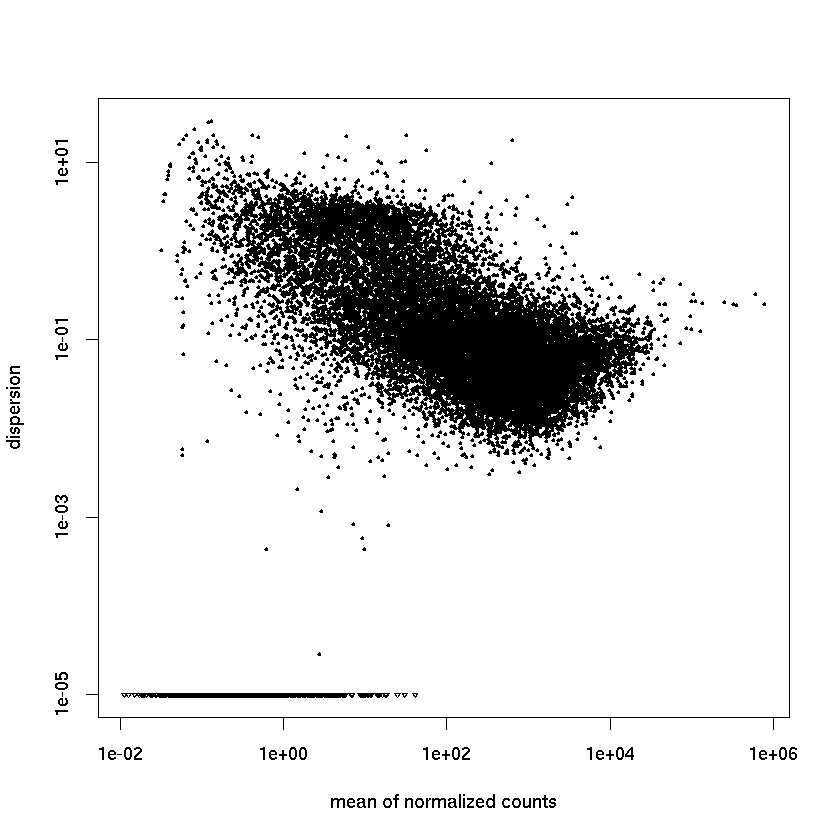

In [33]:
plotDispEsts(ctl_count_data)

In [36]:
DEVal=nbinomTest(ctl_count_data,"Bapd","control")

In [37]:
plotMA(DEVal,col = ifelse(DEVal$pval<=0.05,"red", "gray32"), linecol = "red")

In [38]:
vsdFull = varianceStabilizingTransformation (ctl_count_data)

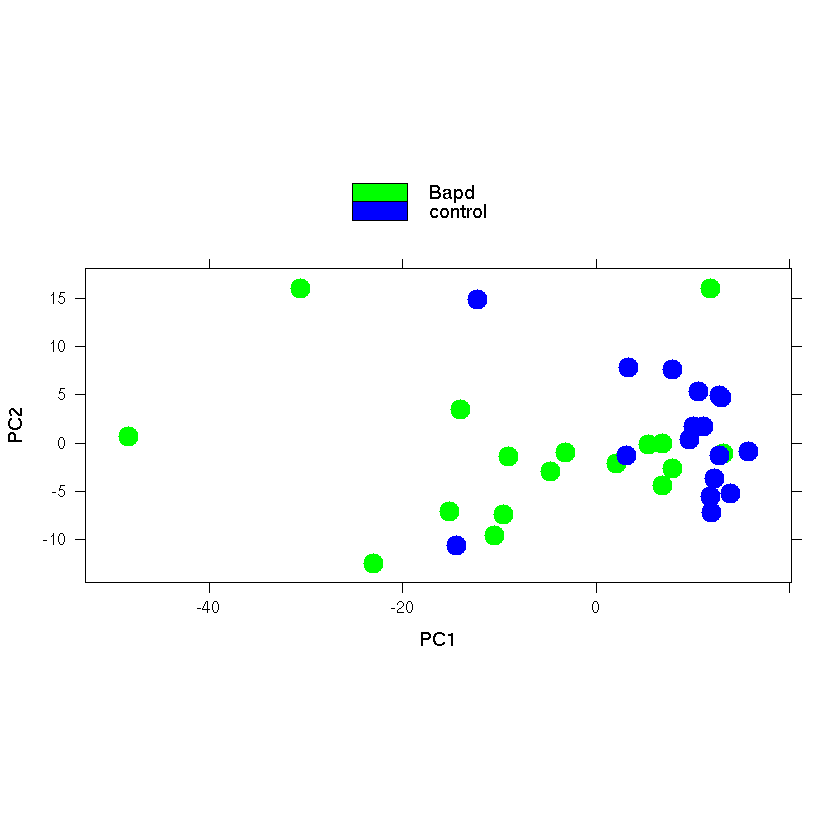

In [39]:
print (plotPCA(vsdFull, intgroup=c("condition")))

In [40]:
write.csv(DEVal,file="ancg
_deseq.csv",quote=F)